In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import os, glob
import numpy as np

In [5]:
os.chdir(".")
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
combinedf = pd.concat([pd.read_csv(f) for f in all_filenames ],sort=False)
combinedf.to_csv( "Players.csv", index=False, encoding='utf-8')

In [8]:
Players = pd.read_csv('Players.csv')

In [54]:
Players.head()

,Season,League,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR
0,2017-2018,Bundesliga,1,David Abraham,ar ARG,DF,Eint Frankfurt,31.0,1986.0,27,27,"2,302",0,2,0,0,3,0
1,2017-2018,Bundesliga,2,Amir Abrashi,al ALB,MF,Freiburg,27.0,1990.0,12,11,850,0,0,0,0,2,0
2,2017-2018,Bundesliga,3,René Adler,de GER,GK,Mainz 05,32.0,1985.0,14,14,"1,260",0,0,0,0,0,0
3,2017-2018,Bundesliga,4,Ailton,br BRA,"DF,FW",Stuttgart,22.0,1995.0,5,1,108,0,0,0,0,0,0
4,2017-2018,Bundesliga,5,Manuel Akanji,ch SUI,DF,Dortmund,22.0,1995.0,11,10,904,0,0,0,0,2,0


In [55]:
Strikers = Players.copy()
agressive = Players.copy()
oldest = Players.copy()
youngest = Players.copy()


Top 5 Strikers in Europe

In [56]:
Strikers = Strikers.groupby('Player').sum()
Strikers.sort_values(by=['Gls'], inplace=True, ascending=False)
Strikers = Strikers.head(5)
Strikers.drop(['Rk', 'Age', 'Born', 'Starts', 'PK', 'CrdY', 'CrdR', 'PKatt'], axis=1, inplace=True)
Strikers.head()

,MP,Gls,Ast
Player,,,
Lionel Messi,103,95,46
Robert Lewandowski,94,85,13
Ciro Immobile,106,80,21
Cristiano Ronaldo,91,78,18
Mohamed Salah,108,73,28


Top 5 Strikers Bar Chart

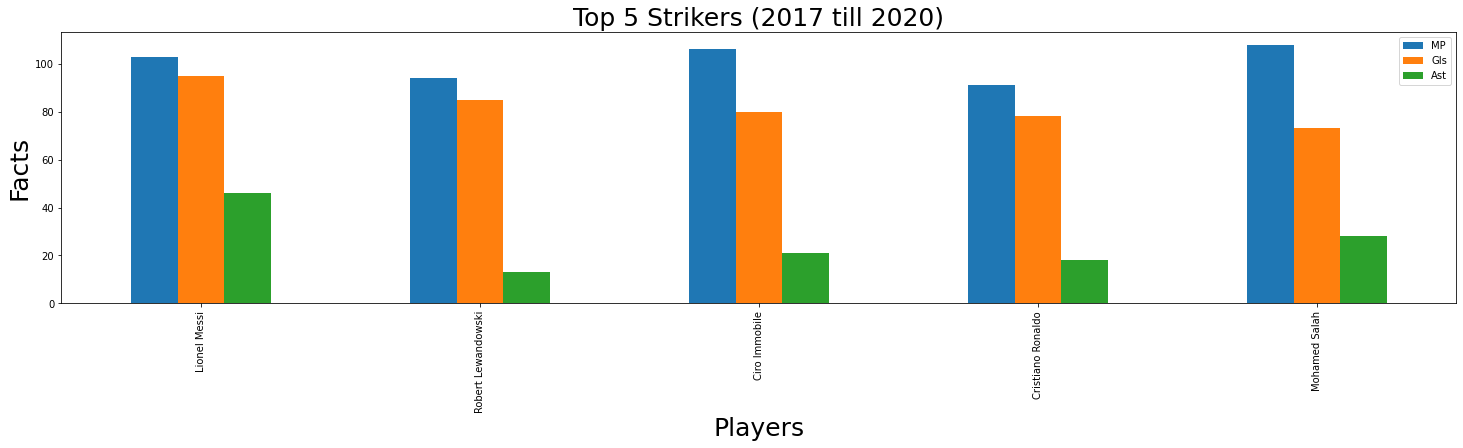

In [57]:
Strikers.plot.bar()
plt.xlabel("Players", fontsize=25)
plt.ylabel("Facts", fontsize=25)
plt.title("Top 5 Strikers (2017 till 2020)", fontsize=25)
plt.rcParams['figure.figsize'] = (25,5);
plt.show()

Top 5 Strikers Goals Percentage

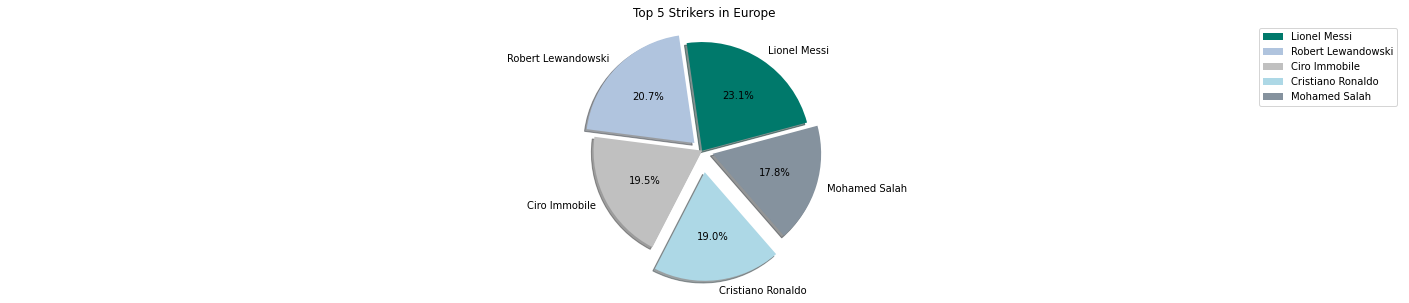

In [87]:
Goals = [95,85,80,78,73]

my_labels = 'Lionel Messi','Robert Lewandowski','Ciro Immobile', 'Cristiano Ronaldo', 'Mohamed Salah'
my_colors = ['#00796B','lightsteelblue','silver','lightblue','#85929E']
my_explode = (0, 0.1, 0, 0.2, 0.1)
textprops = {"fontsize":55}
plt.pie(Goals, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Top 5 Strikers in Europe')
plt.axis('equal')
plt.legend()
plt.show()

In [88]:
oldest.describe()

,Rk,Age,Born,MP,Starts,Gls,Ast,PK,PKatt,CrdY,CrdR
count,7444.000000,7439.000000,7439.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000
mean,248.682966,25.330958,1992.325850,18.629232,14.696131,1.797421,1.222730,0.166980,0.216416,2.697206,0.146024
std,143.353144,4.468665,4.542976,11.378167,11.338386,3.402556,2.000628,0.742687,0.884150,2.793812,0.435289
min,1.000000,14.000000,1977.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,22.000000,1989.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249.000000,25.000000,1993.000000,19.000000,13.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,373.000000,28.000000,1996.000000,29.000000,24.000000,2.000000,2.000000,0.000000,0.000000,4.000000,0.000000
max,499.000000,41.000000,2004.000000,38.000000,38.000000,36.000000,21.000000,14.000000,15.000000,17.000000,5.000000


In [89]:
age = oldest.groupby('Player').sum()
age.sort_values(by=['Age'], inplace=True, ascending=False)
age = age.head()
age.drop(['Rk', 'Born', 'Starts', 'PK', 'CrdY', 'CrdR', 'PKatt'], axis=1, inplace=True)
age.head()

,Age,MP,Gls,Ast
Player,,,,
Raúl García,242.0,152,34,8
Naldo,191.0,93,8,4
Marcelo,183.0,151,8,12
Rafinha,164.0,97,8,6
Rômulo,156.0,87,5,11


In [95]:
# Establish the bins 

num_players = oldest.count()[0]# Display the total number of players
pd.DataFrame({"Total Players": [num_players]})

player_demographics = oldest.loc[:, ["Player", "Age", "Gls"]]
age_bins = [9.90, 14.90, 19.90, 24.90, 29.90, 34.90, 39.90, 99999]
group_names = ["10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

# Categorize the existing players using the age bins
player_demographics["Age Ranges"] = pd.cut(player_demographics["Age"], age_bins, labels=group_names)

# Calculate the Numbers and Percentages by Age Group
age_demographics_totals = player_demographics["Age Ranges"].value_counts()
age_demographics_percents = age_demographics_totals / num_players
age_demographics = pd.DataFrame({"Total Count": age_demographics_totals, "Percentage of Players": age_demographics_percents})

# Minor Data Munging
age_demographics['Percentage of Players'] = age_demographics['Percentage of Players'].map("{:,.2%}".format)

# Display Age Demographics Table
age_demographics = age_demographics.sort_index()
age_demographics

,Total Count,Percentage of Players
10-14,1,0.01%
15-19,700,9.40%
20-24,2648,35.57%
25-29,2680,36.00%
30-34,1238,16.63%
35-39,166,2.23%
40+,6,0.08%


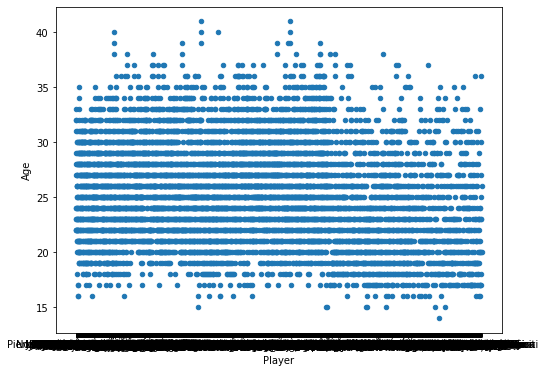

In [97]:
oldest.plot.scatter(x='Player', y='Age', figsize=(8,6))
plt.show()

In [ ]:
my_labels = 'Lionel Messi','Robert Lewandowski','Ciro Immobile', 'Cristiano Ronaldo', 'Mohamed Salah'
my_colors = ['#00796B','lightsteelblue','silver','lightblue','#85929E']
my_explode = (0, 0.1, 0, 0.2, 0.1)
textprops = {"fontsize":55}
plt.pie(Goals, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Top 5 Strikers in Europe')
plt.axis('equal')
plt.legend()
plt.show()